## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [0]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [85]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]  #data是str
type(data)

784594


str

In [86]:
data.replace('\n','')  #去掉尾碼

"n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpgn00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpgn00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpgn00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpgn00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpgn00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpgn00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpgn00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpgn00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpgn00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpgn00015388_514\thttp://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpgn00015388_671\thttp://farm4.static.flickr.com/3217/2942611930_d68204f726.jpgn00015388_686\thttp://farm1.static.fl

In [0]:
dat1 = data.replace('\t', ' ') #去掉'\t

In [88]:
dat1[0:100]

'n00015388_157 http://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238 http://farm2'

In [0]:
lis = dat1.split() #type轉成list

In [90]:
lis[0:2]

['n00015388_157',
 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg']

In [0]:
import numpy as np
arr = np.array(lis)

In [92]:
arr[1]

'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [93]:
arr.shape

(20008,)

In [0]:
arr = arr.reshape(10004,2)

In [95]:
arr[0]

array(['n00015388_157',
       'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'],
      dtype='<U233')

## 將 txt 轉成 pandas dataframe

In [96]:
import pandas as pd

    
df = pd.DataFrame(arr, columns = ['No', 'Link'])
df.head()

,No,Link
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [97]:
df.count()


No      10004
Link    10004
dtype: int64

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

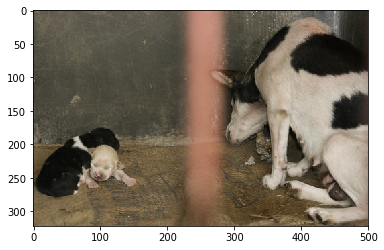

In [98]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[1,"Link"]

response = requests.get(first_link)  #取得連接
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [99]:
df[0:5].values


array([['n00015388_157',
        'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'],
       ['n00015388_238',
        'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'],
       ['n00015388_304',
        'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'],
       ['n00015388_327',
        'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'],
       ['n00015388_355',
        'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']],
      dtype=object)

In [100]:
1

1

In [0]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    
    for i in url_list:
      res = requests.get(i)
      try:
        if res.status_code == requests.codes.ok:  #顯示 200 就代表沒問題 
          img1 = Image.open(BytesIO(res.content))
          img1 = np.array(img1)
          plt.imshow(img1)
          plt.show()
        else:
          print('Error'  ) 
      except:
        print("Except")
                      
    #return img_arr

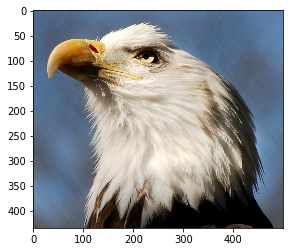

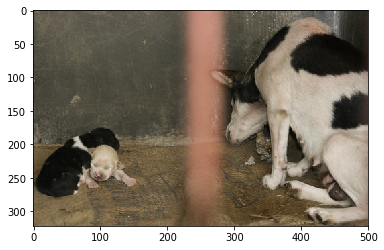

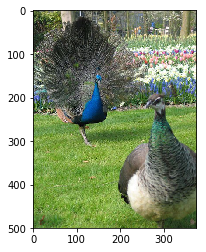

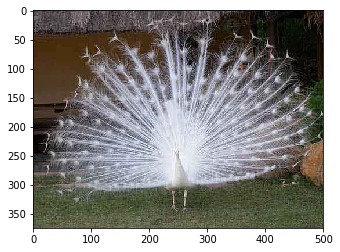

Error


TypeError: ignored

In [126]:
#result = img2arr_fromURLs(df[0:5][1].values)

result = img2arr_fromURLs(df.loc[0:4,"Link"])
print("Total images that we got: %i " % len(result))

for im_get in result:
    plt.imshow(im_get)
    plt.show()